# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [130]:
import sys

In [131]:
!pip3 install -U wbdata

In [132]:
import wbdata
import pandas as pd


In [133]:
wbdata.get_sources()
wbdata.get_indicators(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [134]:
indicadores = {'SP.POP.TOTL.MA.IN':'Poblacion_masculina','SP.POP.TOTL.FE.IN':'poblacion_femenina'}
data = wbdata.get_dataframe(indicadores, country=['ARG','BRA'], date=("2022","2023"))

df = pd.DataFrame(data=data)
df.head()

Poblacion_masculina  poblacion_femenina
country   date                                         
Argentina 2023           22596984.0          22941417.0
          2022           22527129.0          22880775.0
Brazil    2023          103913061.0         107227668.0
          2022          103548935.0         106757480.0

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

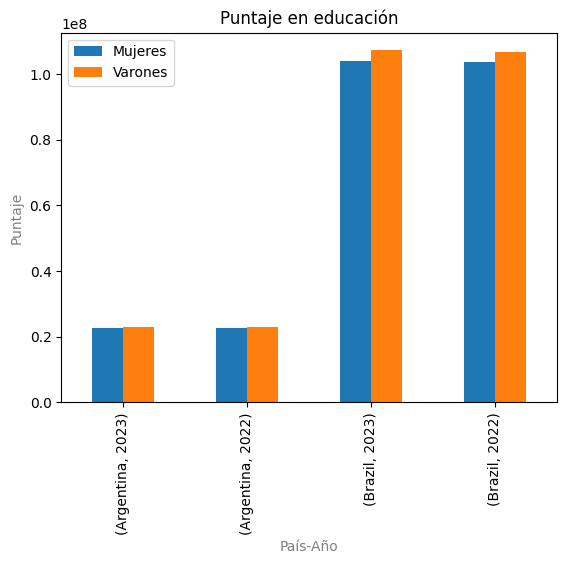

In [135]:
# Resolver acá
ax = df.plot(kind='bar', title='Puntaje en educación')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.legend(["Mujeres","Varones"])

In [136]:
df.reset_index(inplace=True)
df

,country,date,Poblacion_masculina,poblacion_femenina
0,Argentina,2023,22596984.0,22941417.0
1,Argentina,2022,22527129.0,22880775.0
2,Brazil,2023,103913061.0,107227668.0
3,Brazil,2022,103548935.0,106757480.0


In [137]:
print(df["date"].dtype) # no es numérica
df_2022 = df[df["date"]=="2022"]
df_2022

object


,country,date,Poblacion_masculina,poblacion_femenina
1,Argentina,2022,22527129.0,22880775.0
3,Brazil,2022,103548935.0,106757480.0


In [138]:
df_2022 = df_2022.set_index(["country", "date"])
df_2022

,,Poblacion_masculina,poblacion_femenina
country,date,,
Argentina,2022,22527129.0,22880775.0
Brazil,2022,103548935.0,106757480.0


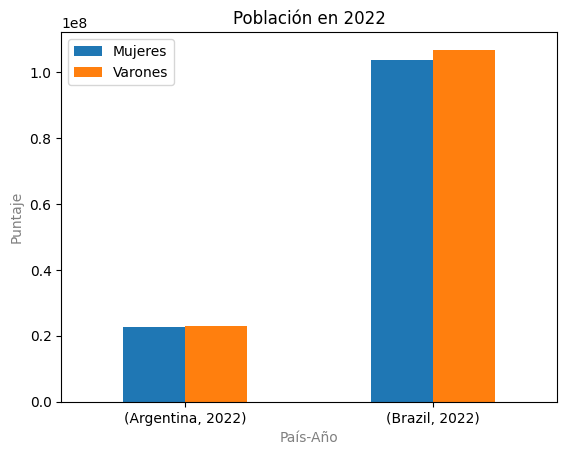

In [139]:
ax = df_2022.plot(kind='bar', title='Población en 2022')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.tick_params(axis="x", rotation=0)
ax.legend(["Mujeres","Varones"])

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [140]:
# Resolver acá estilo pyplot


In [141]:
# Resolver acá estilo orientado-objetos
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [142]:
# Resolver acá
